In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
df1 = pd.read_csv('marine-historical-2019-tc.csv')
df2 = pd.read_csv('marine-historical-2020-tc.csv')
df3 = pd.read_csv('marine-historical-2021-tc.csv')
df = pd.concat([df1,df2],axis = 0)
df = pd.concat([df,df3],axis = 0)
bool_array = df.applymap(lambda x: '<' not in str(x))
df = df[bool_array]
df.dropna(how = 'any',axis = 0,inplace = True)
df.to_csv('processed_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   水質管制區              2708 non-null   object 
 1   監測站                2708 non-null   object 
 2   日期                 2708 non-null   object 
 3   樣本編號               2708 non-null   int64  
 4   深度                 2708 non-null   object 
 5   五天生化需氧量 (毫克/升)     2708 non-null   object 
 6   氨氮 (毫克/升)          2708 non-null   float64
 7   葉綠素-a (微克/升)       2708 non-null   object 
 8   溶解氧飽和百分率 (百分率)     2708 non-null   int64  
 9   溶解氧 (毫克/升)         2708 non-null   float64
 10  大腸桿菌 (菌落數/100毫升)   2708 non-null   object 
 11  糞大腸菌群 (菌落數/100毫升)  2708 non-null   object 
 12  硝酸鹽氮 (毫克/升)        2708 non-null   object 
 13  亞硝酸鹽氮 (毫克/升)       2708 non-null   object 
 14  正磷酸鹽磷 (毫克/升)       2708 non-null   object 
 15  酸鹼值                2708 non-null   float64
 16  脫鎂色素 (微克/升)        2708 

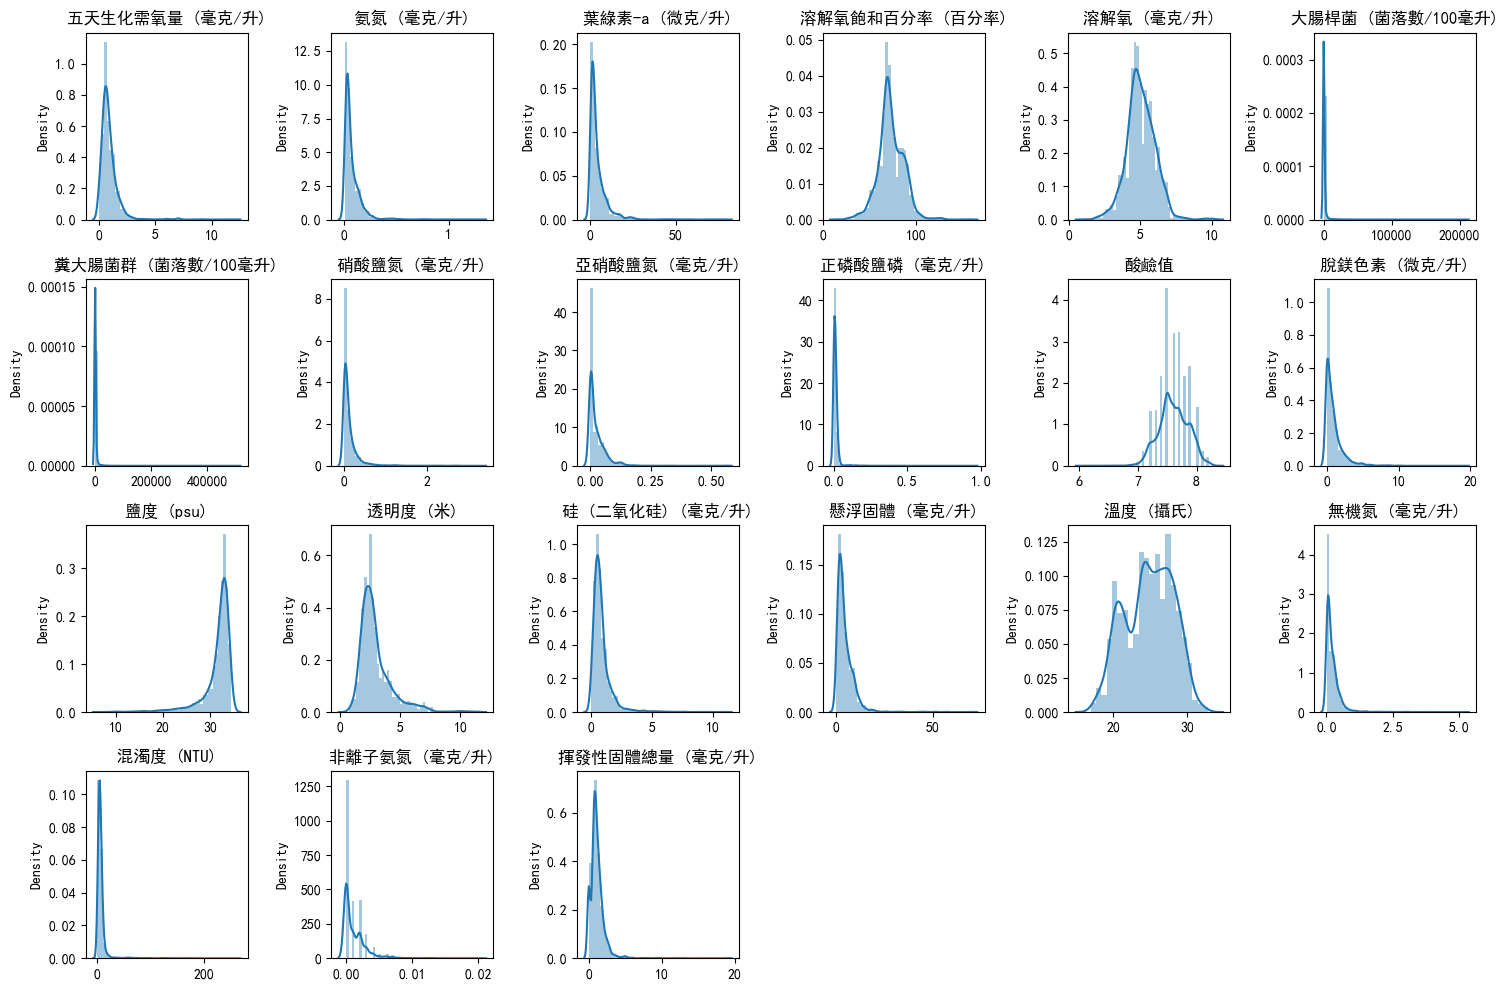

In [ ]:
df0 = pd.concat([df.iloc[:, 5:23], df.iloc[:, 26:]], axis=1)
df = pd.concat([df.iloc[:, :5], df1], axis=1)

cols = df.columns.values[5:]

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(15,10))

for col in range(len(cols)):
    plt.subplot(4, 6, col+1)
    plt.title(cols[col])
    sns.distplot(df, x=df[cols[col]])
plt.tight_layout()
plt.show()

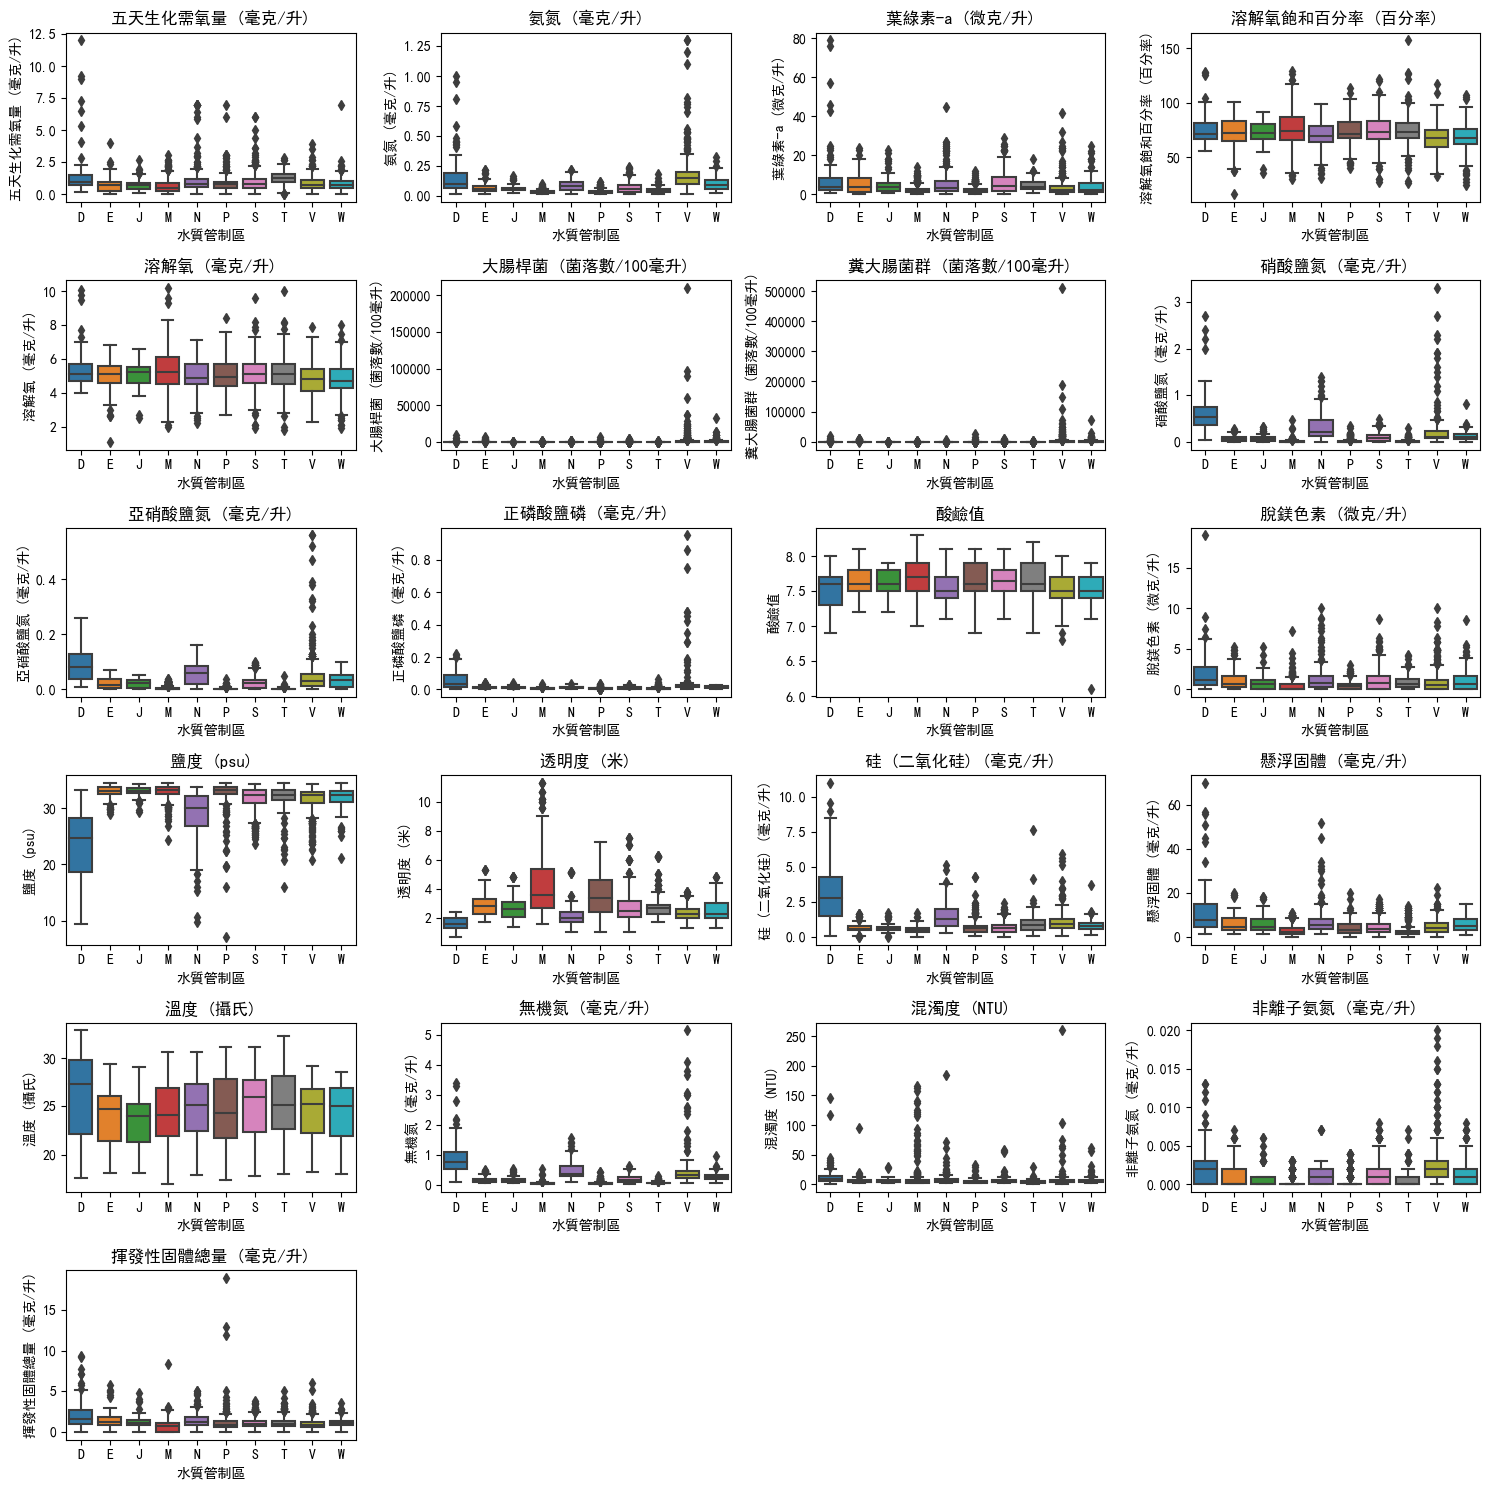

In [ ]:
loca = df['水質管制區']
for l in range(len(loca)):
    loca.iloc[l] = df['監測站'].iloc[l][:1]

fig = plt.figure(figsize=(15,15))

for col in range(len(cols)):
    plt.subplot(6, 4, col+1)
    plt.title(cols[col])
    sns.boxplot(data=df, y=df[cols[col]], x=loca)
plt.tight_layout()
plt.show()

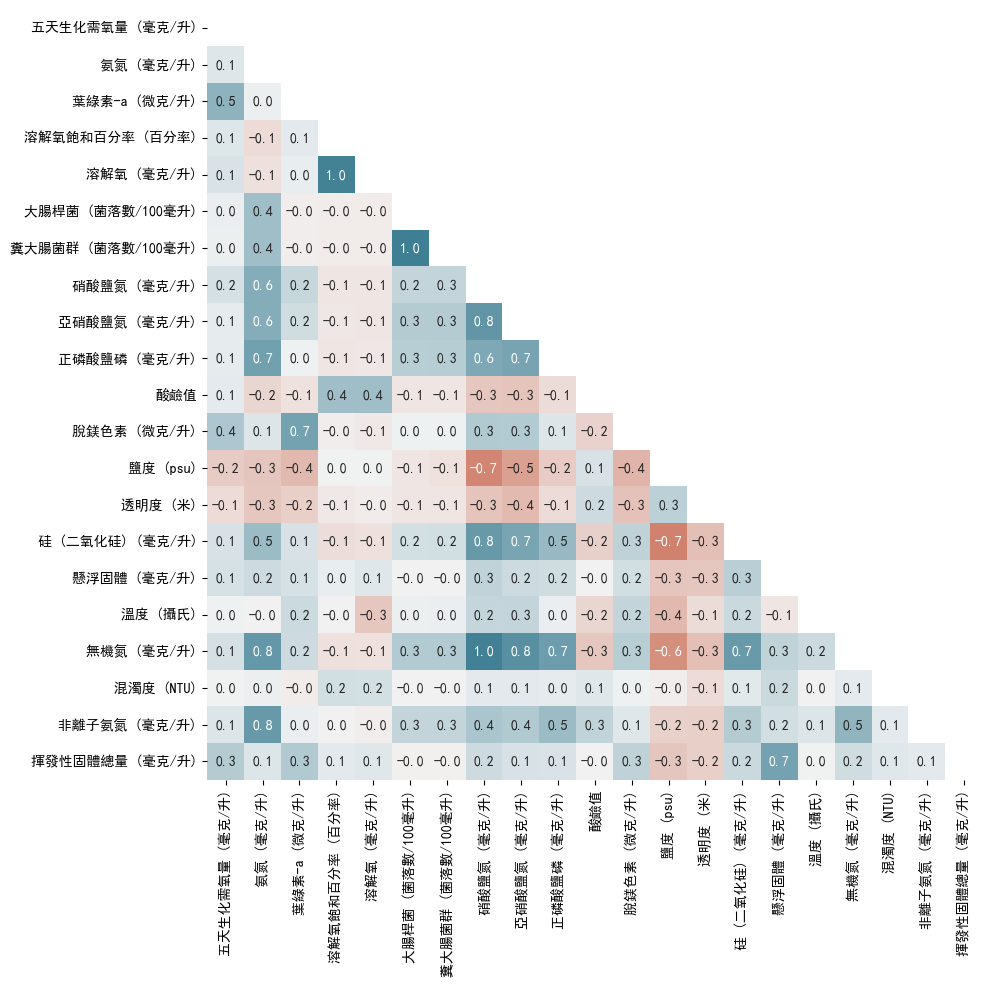

In [ ]:
plt.subplots(figsize=(10, 10))

mask = np.zeros_like(df.iloc[:, 5:].corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.iloc[:, 5:].corr(), cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, center = 0, annot=True, cbar=False, fmt='.1f');

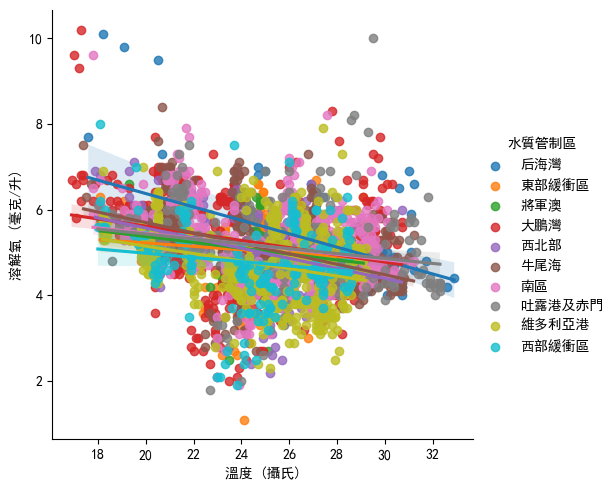

In [ ]:
sns.lmplot(data=df, x='溫度 (攝氏)', y='溶解氧 (毫克/升)', hue='水質管制區');

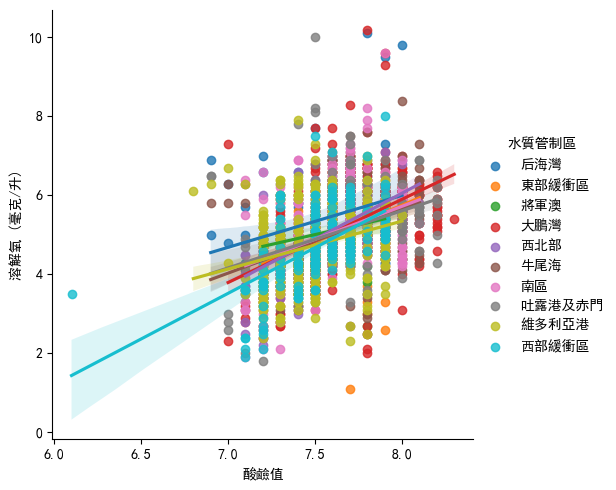

In [ ]:
sns.lmplot(data=df, x='酸鹼值', y='溶解氧 (毫克/升)', hue='水質管制區');

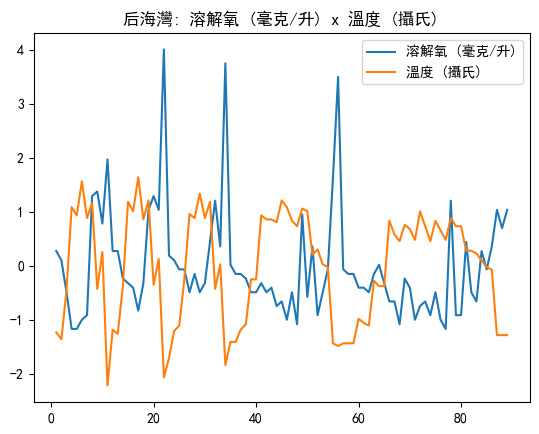

In [ ]:
zone = df.groupby('水質管制區')
d_o2 = zone.get_group('后海灣')['溶解氧 (毫克/升)']
temp = zone.get_group('后海灣')['溫度 (攝氏)']
avg_d_o2 = [d_o2.mean() for i in range(len(d_o2))]
avg_temp = [temp.mean() for j in range(len(temp))]
std_d_o2 = d_o2.std()
std_temp = temp.std()
norm_d_o2 = (d_o2 - avg_d_o2) / std_d_o2
norm_temp = (temp - avg_temp) / std_temp

x = [i for i in range(1, len(d_o2)+1)]

plt.rcParams['axes.unicode_minus'] = False
plt.plot(x, norm_d_o2, label='溶解氧 (毫克/升)')
plt.plot(x, norm_temp, label='溫度 (攝氏)')
plt.legend(loc=1)
plt.title('后海灣: 溶解氧 (毫克/升) x 溫度 (攝氏)')
plt.show()

Note: For coding convenience, processed_data.csv provided in the data folder has been translated in english version. 

Causal Discovery Toolbox

In [ ]:
import cdt
from cdt import SETTINGS
SETTINGS.verbose=True
#SETTINGS.NJOBS=16
#SETTINGS.GPU=1
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("./processed_data.csv")
print(data.head())

glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(data)
model = cdt.causality.pairwise.ANM()
output_graph = model.predict(data, skeleton)
options = {
        "node_color": "#A0CBE2",
        "width": 2,
        "node_size":200,
        "edge_cmap": plt.cm.Blues,
        "with_labels": True,
        "linewidths":4,
    }
nx.draw_networkx(output_graph,pos = nx.circular_layout(output_graph))

nx.draw(output_graph,pos = nx.circular_layout(output_graph),width=1, node_size =200,edge_cmap=plt.cm.gray,with_labels= True)
plt.figure(figsize=(100,50))
plt.show() # Figure 7


# PC alorigthm method
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz,chisq,gsq,mv_fisherz,kci


# example_data = np.loadtxt("C:/Users/lenovo/Desktop/maroo.txt",skiprows=1)
# example_result = pc(example_data,0.05,kci,True,0,-1)

example_data = np.loadtxt("C:/Users/lenovo/Desktop/marsd.txt",skiprows=1) 
example_result = pc(example_data,0.5,kci,True,0,-1)

#see figure 6
example_result.to_nx_graph()
example_result.draw_nx_graph(skel=False)

DoWhy

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import dowhy

sns.set_style('whitegrid')

df = pd.read_csv('./processed_data.csv')

#       VISUALISATION
# col = [df.columns[i] for i in range(5, df.shape[1]-1)] #last col is Water Control Zone short
# print(col)

# fig = plt.figure(figsize=(8, 8))
# sns.heatmap(df[col].corr(), annot=True, cbar=False, cmap='Blues', fmt='.1f')
# plt.show()

columns_of_interest = ['5-day Biochemical Oxygen Demand (mg/L)', 'Chlorophyll-a (μg/L)', 'Dissolved Oxygen (mg/L)', 
                       'E. coli (cfu/100mL)', 'Faecal Coliforms (cfu/100mL)', 'Temperature (°C)', 'Turbidity (NTU)']
data = df[columns_of_interest]


prior = '''graph[directed 1 node[id "bio_oxy_demand_5d" label "5-day Biochemical Oxygen Demand (mg/L)"]
node[id "chloro" label "Chlorophyll-a (μg/L)"]
node[id "temp" label "Temperature (°C)"]
node[id "oxygen" label "Dissolved Oxygen (mg/L)"]
node[id "ecoli" label "E. coli (cfu/100mL)"]
node[id "fecelcoli" label "Faecal Coliforms (cfu/100mL)"]
node[id "turb" label "Turbidity (NTU)"]
edge[source "chloro" target "oxygen"]
edge[source "chloro" target "temp"]
edge[source "turb" target "oxygen"]
edge[source "turb" target "bio_oxy_demand_5d"]
edge[source "turb" target "temp"]
edge[source "turb" target "chloro"]
edge[source "ecoli" target "oxygen"]
edge[source "ecoli" target "bio_oxy_demand_5d"]
edge[source "temp" target "oxygen"]
edge[source "temp" target "bio_oxy_demand_5d"]
edge[source "fecelcoli" target "bio_oxy_demand_5d"]
edge[source "fecelcoli" target "turb"]
edge[source "fecelcoli" target "temp"]
edge[source "fecelcoli" target "chloro"]
]'''.replace('\n', '')

## ALTERNATIVELY, USE DOT format
# prior = """digraph {
# bio_oxy_demand_5d[label="5-day Biochemical Oxygen Demand (mg/L)"];
# chloro[label="Chlorophyll-a (μg/L)"]
# temp[label="Temperature (°C)"]
# oxygen[label="Dissolved Oxygen (mg/L)"]
# ecoli[label="E. coli (cfu/100mL)"]
# fecelcoli[label="Faecal Coliforms (cfu/100mL)"]
# turb[label="Turbidity (NTU)"]
# chloro->oxygen;
# chloro->temp;
# turb->oxygen;
# turb->bio_oxy_demand_5d;
# turb->temp;
# turb->chloro;
# ecoli->oxygen;
# ecoli->bio_oxy_demand_5d;
# temp->oxygen;
# temp->bio_oxy_demand_5d;
# fecelcoli->bio_oxy_demand_5d;
# fecelcoli->turb;
# fecelcoli->temp;
# fecelcoli->chloro;
# }"""

# CAUSAL INFERENCE ON TOP OF SUSPECTED CAUSAL RELATIONSHIP (Temp->Dissolved Oxygen)
model = dowhy.CausalModel(data=data, treatment='Temperature (°C)', outcome='Dissolved Oxygen (mg/L)', graph=prior) #, common_causes=['Chlorophyll-a (μg/L)', 'Faecal Coliforms (cfu/100mL)'])
model.view_model()

identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)
estimate = model.estimate_effect(identified_estimand, method_name='backdoor.linear_regression', target_units='ate')
print(estimate)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(E[Dissolved Oxygen (mg/L)|Chlorophyll-a (μg/L),Turbidity (
d[Temperature (°C)]                                                           

      
NTU)])
      
Estimand assumption 1, Unconfoundedness: If U→{Temperature (°C)} and U→Dissolved Oxygen (mg/L) then P(Dissolved Oxygen (mg/L)|Temperature (°C),Chlorophyll-a (μg/L),Turbidity (NTU),U) = P(Dissolved Oxygen (mg/L)|Temperature (°C),Chlorophyll-a (μg/L),Turbidity (NTU))

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
*** Causal Estimate ***

d:\CondaEnv\dda4220\lib\site-packages\dowhy\causal_estimator.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[prefix + str(em)] = pd.qcut(self._data[em],


In [ ]:
refute1 = model.refute_estimate(identified_estimand, estimate, 'random_common_cause', verbose=0)
print(refute1)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': 

In [ ]:
refute2 = model.refute_estimate(identified_estimand, estimate, 'data_subset_refuter', verbose=0)
print(refute2)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['E. coli (cfu/100mL)']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': 